**Data Dictionary*

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
   1. Value 1: typical angina
   2. Value 2: atypical angina
   3. Value 3: non-anginal pain
   4. Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the 
   hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
   1. Value 0: normal
   2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
   1. Value 1: upsloping
   2. Value 2: flat
   3. Value 3: downsloping
13. ca: number of major vessels (0-3) colored by flourosopy
14. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect    


# Importing Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/heart_disease/heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**The data has no missing values**

# Data Exploration
1. Categorical features
2. Numerical Features

1    713
0    312
Name: sex, dtype: int64


([<matplotlib.axis.XTick at 0x7fa4511fa150>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')])

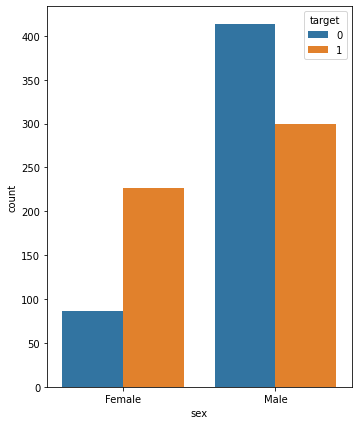

In [ ]:
print(data["sex"].value_counts())
labels = ["Female" , "Male"]
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
sns.countplot(data["sex"] , hue = data["target"])
plt.xticks([0,1],labels)


0    497
2    284
1    167
3     77
Name: cp, dtype: int64


([<matplotlib.axis.XTick at 0x7fa44fb80b90>,
 [Text(0, 0, 'Type 0'),
  Text(0, 0, 'Type 1'),
  Text(0, 0, 'Type 2'),
  Text(0, 0, 'Type 3')])

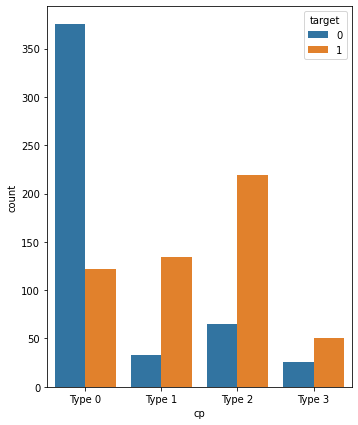

In [ ]:
print(data["cp"].value_counts())
plt.figure(figsize = (12,7))
data["cp"].value_counts()
labels=['Type 0', 'Type 1', 'Type 2', 'Type 3']
plt.subplot(1,2,1)
sns.countplot(data["cp"], hue = data["target"])
plt.xticks([0,1,2,3],labels)


0    872
1    153
Name: fbs, dtype: int64


([<matplotlib.axis.XTick at 0x7f6f3c5ce810>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

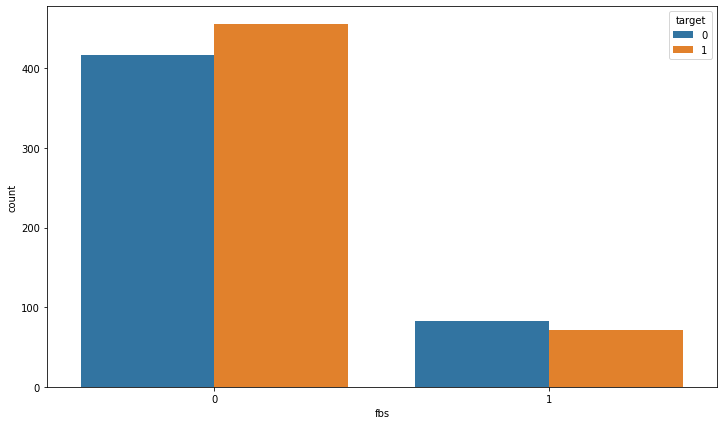

In [ ]:
print(data["fbs"].value_counts())
plt.figure(figsize = (12,7))
data["fbs"].value_counts()
labels=[0, 1]
sns.countplot(data["fbs"], hue = data["target"])
plt.xticks([0, 1],labels)

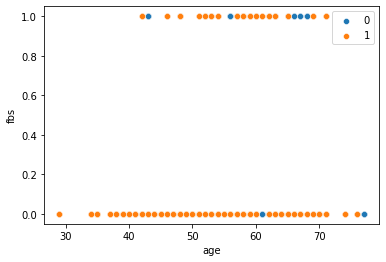

In [ ]:
sns.scatterplot(x = data["age"][data["target"] == 0] , y = data["fbs"][data["target"] == 0])
sns.scatterplot(x = data["age"][data["target"] == 1] , y = data["fbs"][data["target"] == 1])
plt.legend([0,1])


1    513
0    497
2     15
Name: restecg, dtype: int64


([<matplotlib.axis.XTick at 0x7fa44fb88e10>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2')])

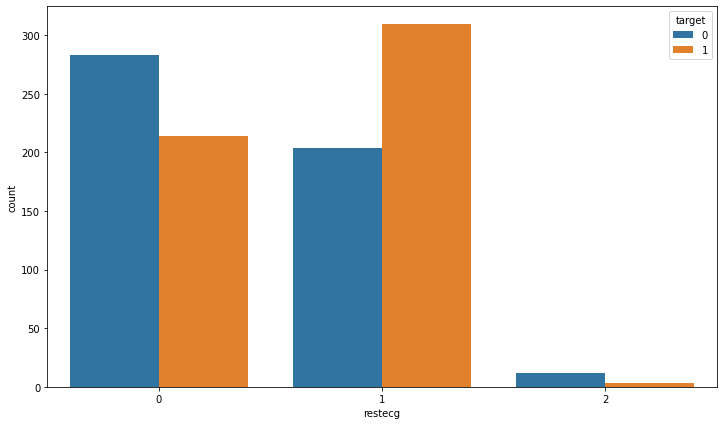

In [ ]:
print(data["restecg"].value_counts())
plt.figure(figsize = (12,7))
data["restecg"].value_counts()
labels=[0,1,2]
sns.countplot(data["restecg"], hue = data["target"])
plt.xticks([0, 1,2],labels)

1    482
2    469
0     74
Name: slope, dtype: int64


([<matplotlib.axis.XTick at 0x7fa44fd96a90>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2')])

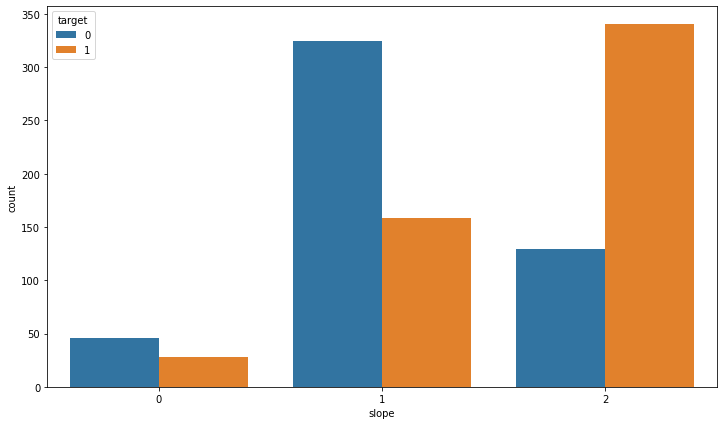

In [ ]:
print(data["slope"].value_counts())
plt.figure(figsize = (12,7))
data["slope"].value_counts()
labels=[0,1,2]
sns.countplot(data["slope"], hue = data["target"])
plt.xticks([0, 1,2],labels)

0    680
1    345
Name: exang, dtype: int64


([<matplotlib.axis.XTick at 0x7fa44f930690>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

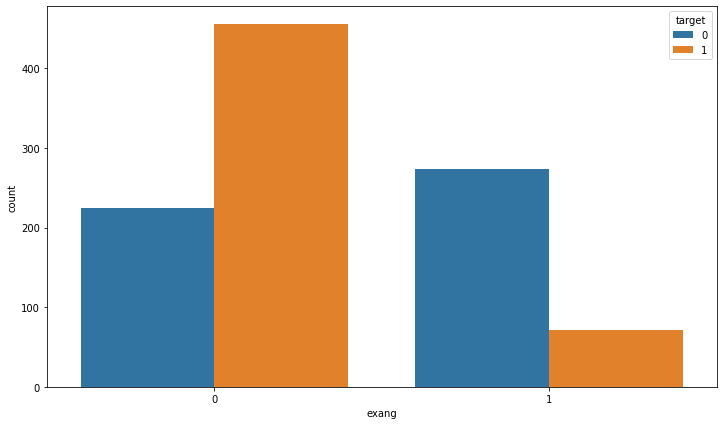

In [ ]:
print(data["exang"].value_counts())
plt.figure(figsize = (12,7))
data["exang"].value_counts()
labels=[0,1]
sns.countplot(data["exang"], hue = data["target"])
plt.xticks([0, 1],labels)

2    544
3    410
1     64
0      7
Name: thal, dtype: int64


([<matplotlib.axis.XTick at 0x7fa44f7ca310>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

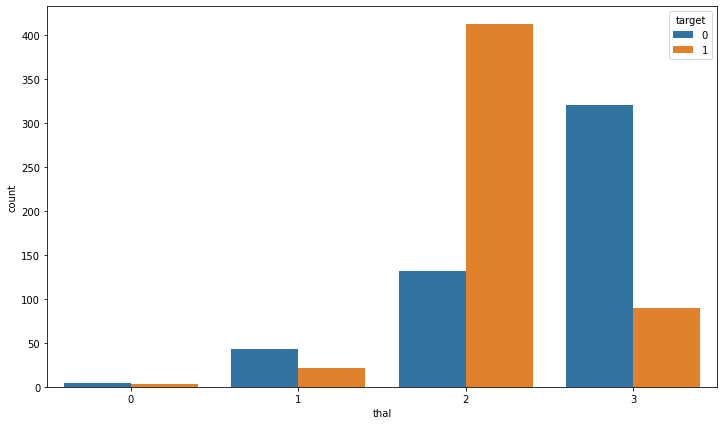

In [ ]:
print(data["thal"].value_counts())
plt.figure(figsize = (12,7))
data["thal"].value_counts()
labels=[0,1,2,3,4]
sns.countplot(data["thal"], hue = data["target"])
plt.xticks([0, 1,2,3],labels)

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64


([<matplotlib.axis.XTick at 0x7fa44f9413d0>,
 [Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')])

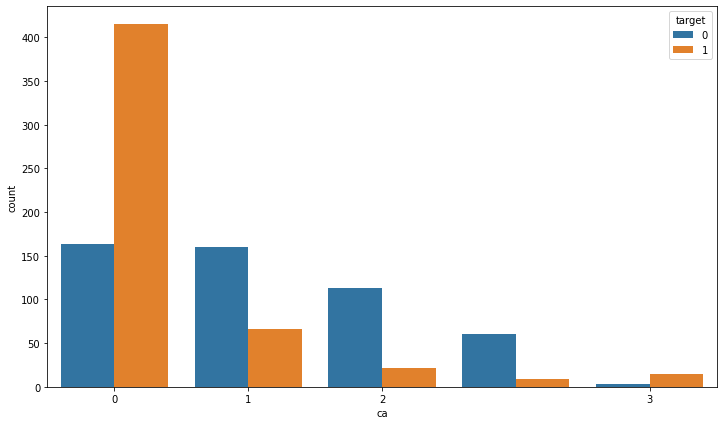

In [ ]:
print(data["ca"].value_counts())
plt.figure(figsize = (12,7))
data["ca"].value_counts()
labels=[0,1,2,3,4]
sns.countplot(data["ca"], hue = data["target"])
plt.xticks([0, 1,2,4],labels)

1    526
0    499
Name: target, dtype: int64


([<matplotlib.axis.XTick at 0x7fa44f74a950>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

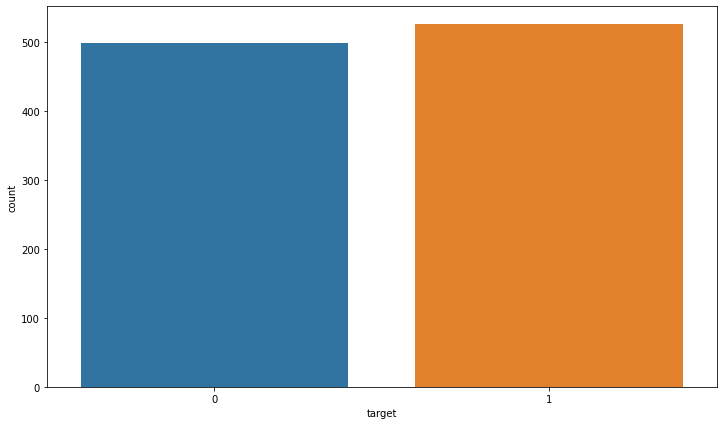

In [ ]:
print(data["target"].value_counts())
plt.figure(figsize = (12,7))
data["target"].value_counts()
labels=[0,1]
sns.countplot(data["target"])
plt.xticks([0, 1],labels)

**Hence Data is balanced**

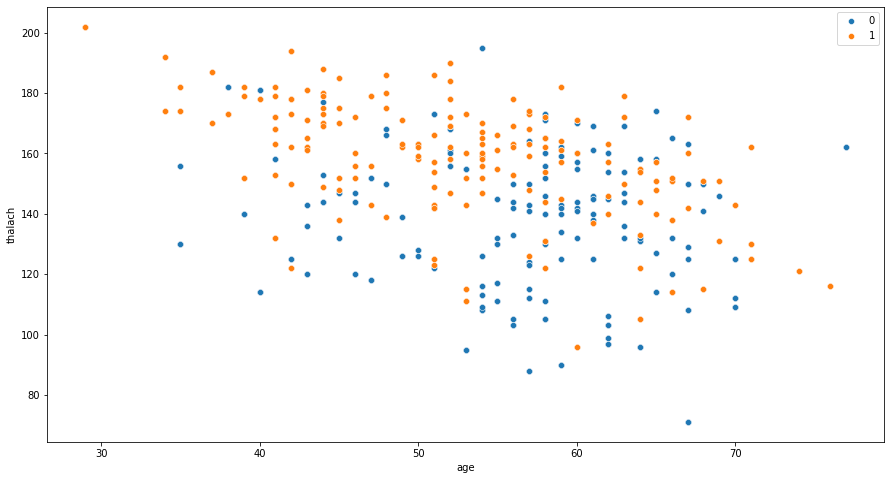

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = data['age'][data["target"]==0] , y = data['thalach'][data["target"]==0] )
sns.scatterplot(x = data['age'][data["target"]==1] , y = data['thalach'][data["target"]==1] )
plt.legend([0,1])

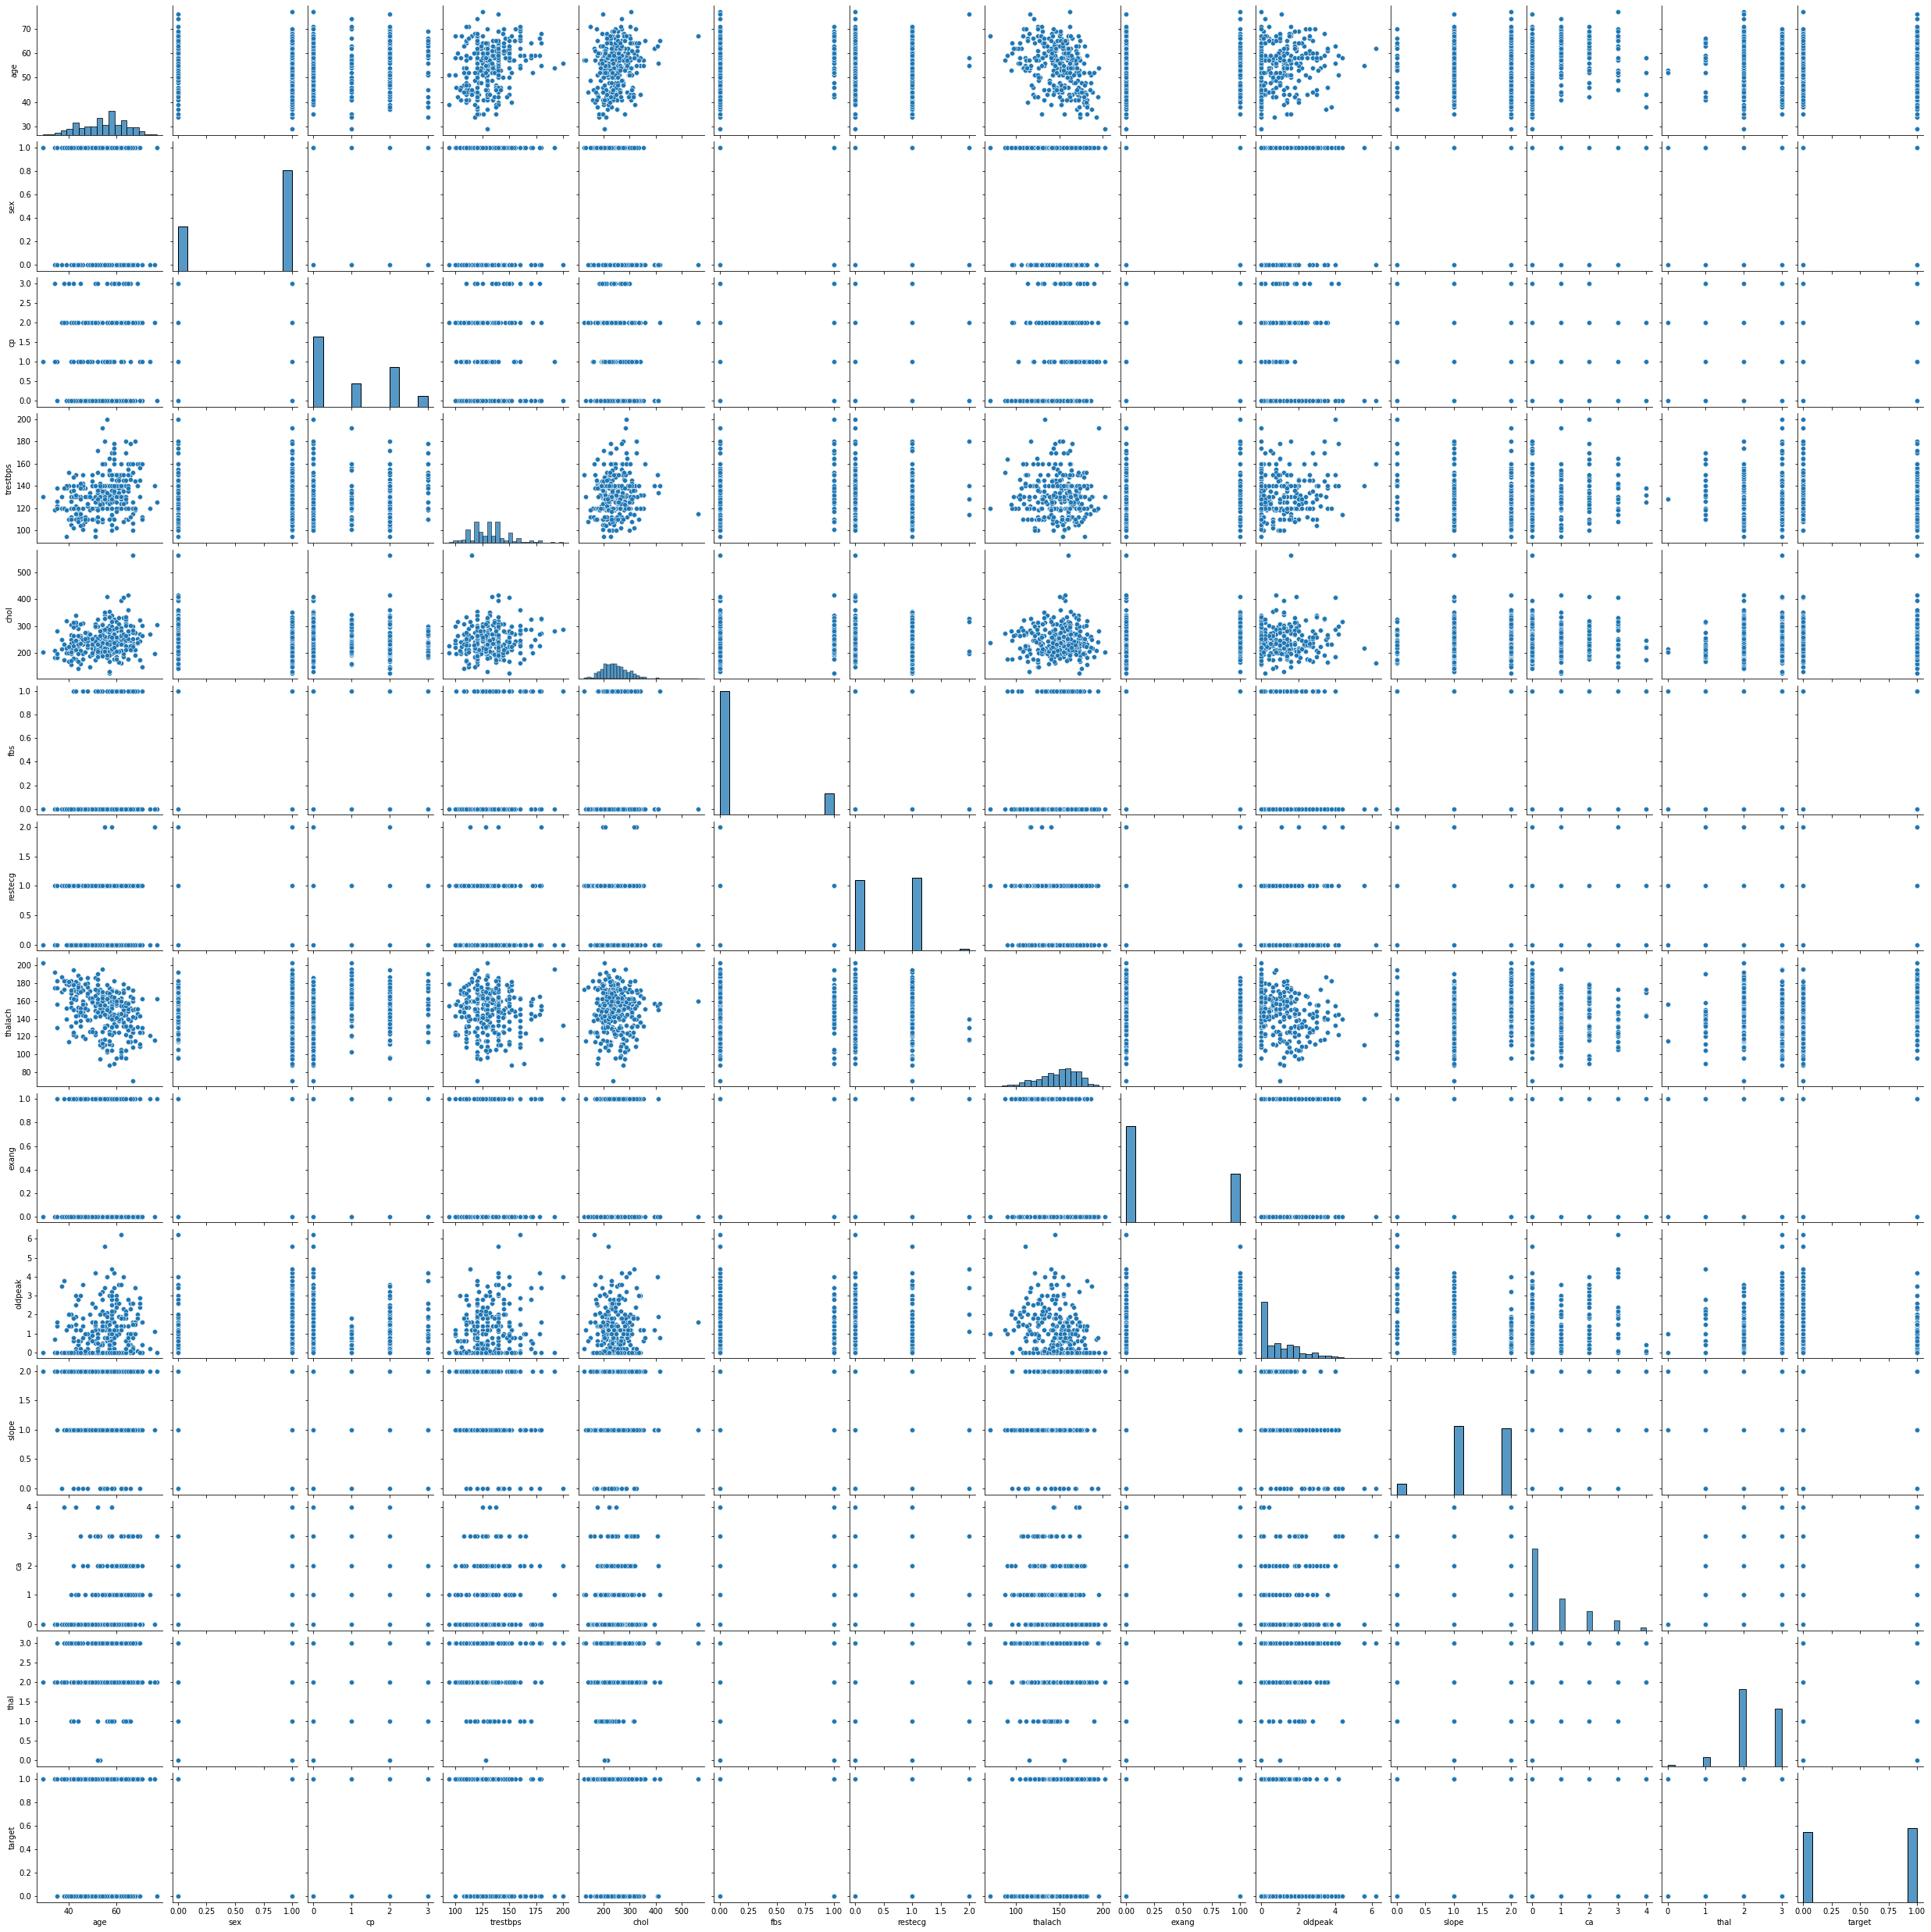

In [ ]:
sns.pairplot(data , hue = data["target"])

In [ ]:
data_corr = data.corr()
data_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


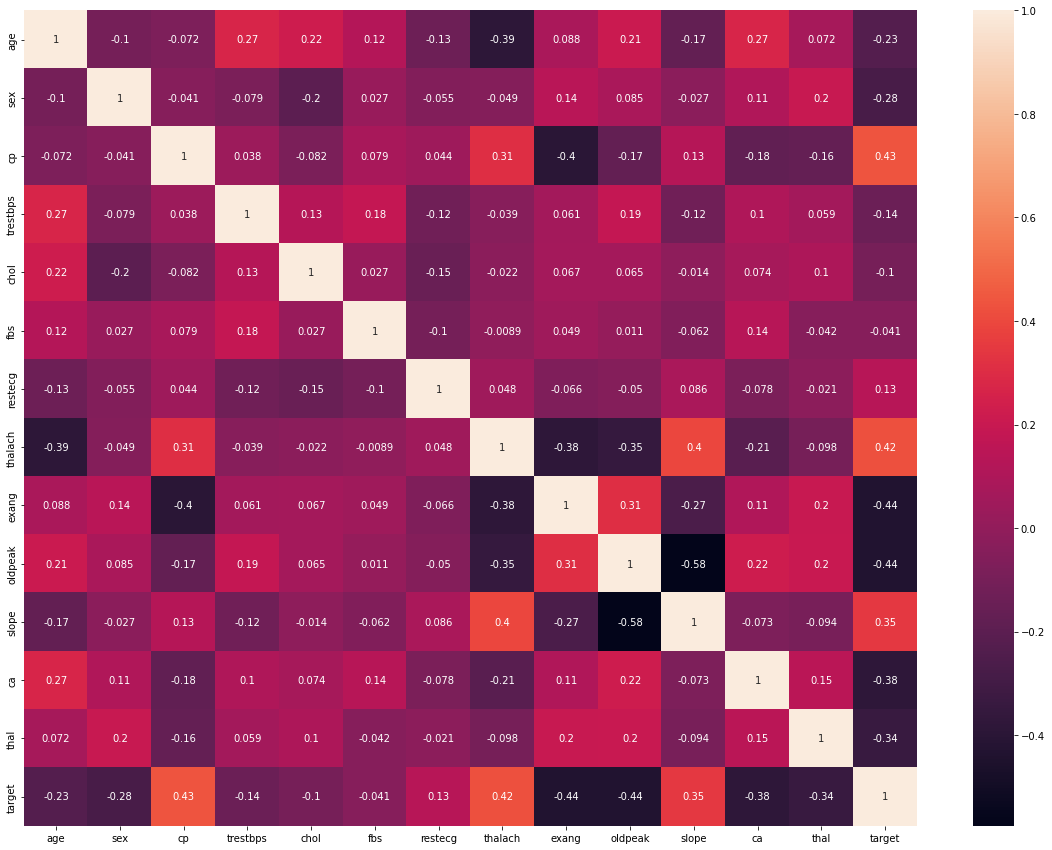

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
ax= sns.heatmap(data_corr,
               annot=True)

# Data Preprocessing


1.   One hot encoding of categorical features (>2 categories)
2.   Normalisisng




In [ ]:
# categorical_features = ["cp" ,"thal" ,"ca" , "restecg" , "slope"]
cp = pd.get_dummies(data["cp"],prefix = "cp")
thal = pd.get_dummies(data["thal"],prefix = "thal")
ca = pd.get_dummies(data["ca"],prefix = "ca")
restecg = pd.get_dummies(data["restecg"],prefix = "restecg")
slope = pd.get_dummies(data["slope"],prefix = "slope")
data_1 = pd.concat([data,cp,thal,ca,restecg , slope] , axis = 1)
data_1.drop(["cp" ,"thal" ,"ca" , "restecg" , "slope"] , axis = 1 , inplace = True)



In [ ]:
data_1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,ca_1,ca_2,ca_3,ca_4,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2
0,52,1,125,212,0,168,0,1.0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,1,...,0,0,0,0,0,1,0,1,0,0
3,61,1,148,203,0,161,0,0.0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,1,...,0,0,1,0,0,1,0,0,1,0


In [4]:
#normalising data using min max scaler
x = data.drop("target", axis = 1)
y= data["target"]

x = MinMaxScaler().fit_transform(x)

In [5]:
# splitting data into train and test data, 80% train 20% test

X_train , X_test , y_train , y_test = train_test_split(x, y , test_size=0.2)

# training on 3 different models
models = {
    "LR" : LogisticRegression(),
    "clf" : RandomForestClassifier(),
    "KNN" : KNeighborsClassifier()
}

def model_score(models , X_train ,X_test , y_train , y_test):
    models_score = {}
    for name , model in models.items():
        model.fit(X_train , y_train)
        models_score[name]= model.score(X_test, y_test)
    return(models_score)        
        


In [6]:
modelScore = model_score(models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)
modelScore

{'LR': 0.8341463414634146, 'clf': 1.0, 'KNN': 0.8292682926829268}

In [7]:
model_compare = pd.DataFrame(modelScore , index = ["accuracy"])
model_compare

,LR,clf,KNN
accuracy,0.834146,1.0,0.829268


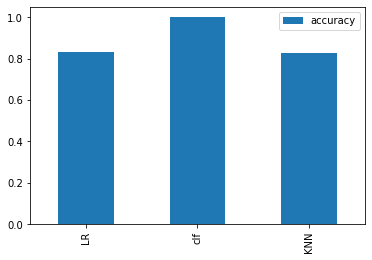

In [8]:
model_compare.T.plot(kind =  "bar")

In [9]:
clf = RandomForestClassifier()
clf.fit(X_train , y_train)
score = clf.score(X_test , y_test)
score

1.0

In [10]:
from sklearn.model_selection import cross_val_score


cvs_precision = cross_val_score(clf, x, y , cv=5 , scoring = "precision")
cvs_accuracy = cross_val_score(clf, x, y , cv=5 , scoring = "accuracy")
cvs_recall = cross_val_score(clf, x, y , cv=5 , scoring = "recall")
cvs_f1 = cross_val_score(clf, x, y , cv=5 , scoring = "f1")

scores = {"precision":cvs_precision.mean(),
         "accuracy": cvs_accuracy.mean(),
         "recall": cvs_recall.mean() ,
         "f1": cvs_f1.mean() }
scores

{'precision': 0.9889398572884811,
 'accuracy': 0.9941463414634146,
 'recall': 1.0,
 'f1': 0.9972093023255815}

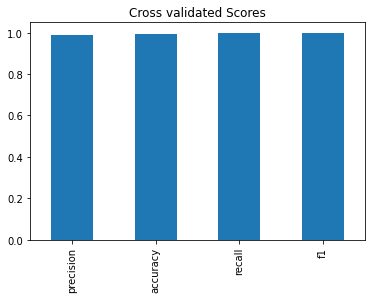

In [11]:
cv_scores = pd.DataFrame(scores, index=[0])
cv_scores.T.plot(kind="bar", legend=False, title="Cross validated Scores")

In [12]:

y_preds = clf.predict(X_test)


print(confusion_matrix(y_test , y_preds))


[[102   0]
 [  0 103]]


Text(13.5, 0.5, 'False Predicted(Diagonal_RL)')

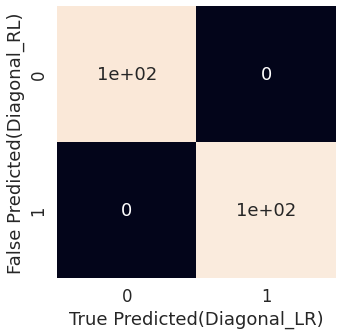

In [13]:
sns.set(font_scale =1.5)
fig, ax = plt.subplots(figsize=(5,5))
ax =sns.heatmap(confusion_matrix(y_test , y_preds), annot=True, cbar=None)
plt.xlabel("True Predicted(Diagonal_LR)")
plt.ylabel("False Predicted(Diagonal_RL)")

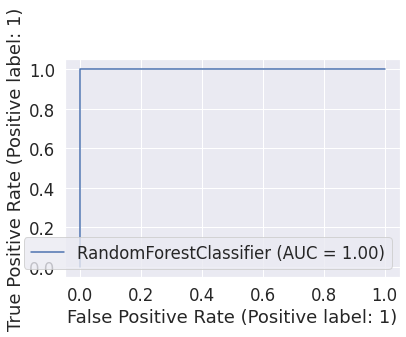

In [14]:

plot_roc_curve(clf, X_test, y_test)

In [15]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [16]:
import pickle
# Save the model as serialized object pickle
with open('/content/drive/MyDrive/heart_disease/model.pkl', 'wb') as file:
    pickle.dump(clf, file)


**Hence out of our 3 models : Logistic Regression , K Nearest Neighbour and Random Forest classifier ; Random forest classifier outperformed with score of 98%**